# Response spectrum

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

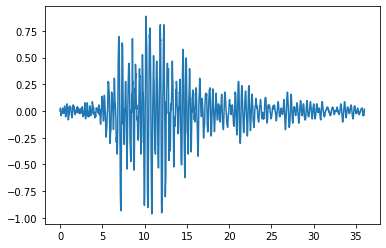

In [ ]:
g = 9.81            # m/s^2
dt = 0.02           # the time step considered by the input data
seism_scale = 0.01  # convert dm/s^2 to m/s^2
seism = np.loadtxt('AcMx1985.txt') * seism_scale
times = np.arange(len(seism))*dt

plt.plot(times, seism)
plt.show()

In [ ]:
damping = 0.05
periods = np.linspace(0.01,2,50)

In [ ]:
def FreeVibration(t, frequency, damping):
    return 1/frequency * np.exp(-damping*frequency*t) * np.sin(frequency*t)

def MaxResponseDuhamel(period, damping):
    frequency = 2*np.pi/period
    free_response = FreeVibration(times, frequency, damping)
    u_duhamel = np.convolve(seism, free_response, 'full') * dt
    u_duhamel = u_duhamel[:len(u_duhamel)//2+1]
    a_duhamel = frequency**2*u_duhamel
    return max(np.absolute(a_duhamel))

Sa_duhamel = [MaxResponseDuhamel(T,damping) for T in periods]

In [ ]:
from scipy.integrate import solve_ivp

# NOTE: this method is not optimized because of the interpolation.
# Therefore, it is slower, although more accurate
def SystemDerivatives(t, y, frequency, damping):
    u = y[0]
    v = y[1]
    s = np.interp(t, times, seism)
    a = s - 2*damping*frequency*v - frequency**2*u
    return [v, a]

def MaxResponseInt(period, damping):
    frequency = 2*np.pi/period
    solution = solve_ivp(fun=SystemDerivatives, t_span=[0, times[-1]],
                         y0=[0,0], t_eval=times, args=[frequency, damping])
    a = frequency**2*solution.y[0]
    return max(np.absolute(a))

Sa_integration = [MaxResponseInt(T,damping) for T in periods]

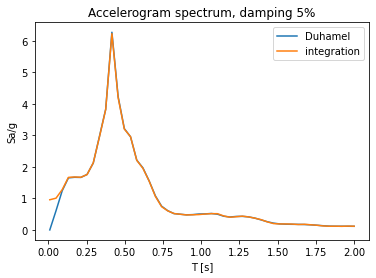

In [ ]:
plt.plot(periods,Sa_duhamel,label='Duhamel')
plt.plot(periods,Sa_integration,label='integration')
plt.title(f'Accelerogram spectrum, damping {damping:.0%}')
plt.ylabel('Sa/g')
plt.xlabel('T [s]')
plt.legend()
plt.show()

In [ ]:
Sa = Sa_integration